### 设置屏幕宽度

In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:80% !important; }</style>"))

### 1、导入tensorflow及相关模块，并设置 GPU 使用占比

In [2]:
import tensorflow as tf

print(tf.__version__)

from tensorflow.python.client import device_lib
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0, 1"
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)
# 设置当前程序的可见设备范围
tf.config.experimental.set_visible_devices(devices=gpus, device_type='GPU')

# 设置仅在需要时申请：
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
# 下面的方式是设置Tensorflow固定消耗GPU:0的2GB显存
tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)]
)

# 获取本地 gpu 资源
# def get_available_gpus():
#   local_device_protos = device_lib.list_local_devices()
#   return [x.name for x in local_device_protos if x.device_type == 'GPU']

# print(get_available_gpus())

2.0.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### 2、创建样本点和变量

In [3]:
num_inputs = 2
num_examples = 1000

with tf.device('/device:GPU:0'):
    w = tf.constant([[2, -3.4]])
    b = tf.constant([4.2])
    x = tf.random.normal([num_examples, num_inputs], mean=0, stddev=10)
    e = tf.random.normal([num_examples, num_inputs], mean=0, stddev=0.1)
    W = tf.Variable(tf.constant([5, 1]))
    B = tf.Variable(tf.constant([1]))
w

<tf.Tensor: id=0, shape=(1, 2), dtype=float32, numpy=array([[ 2. , -3.4]], dtype=float32)>

In [4]:
import random
from matplotlib import pyplot as plt
# 线性回归模型， y = 
# 生成数据,生成1000组数据


true_y = tf.matmul(x, tf.transpose(w)) + b
x, true_y
# 读取数据

(<tf.Tensor: id=7, shape=(1000, 2), dtype=float32, numpy=
 array([[ -5.454692  , -18.360264  ],
        [ -1.4893632 ,  -6.480784  ],
        [ -8.486309  ,  17.809149  ],
        ...,
        [  2.622642  ,   1.1596594 ],
        [ -7.5587454 ,  -0.02515074],
        [ 16.092926  ,  11.462359  ]], dtype=float32)>,
 <tf.Tensor: id=32, shape=(1000, 1), dtype=float32, numpy=
 array([[ 5.57155190e+01],
        [ 2.32559395e+01],
        [-7.33237305e+01],
        [ 2.97581787e+01],
        [-6.93986206e+01],
        [-5.37457561e+00],
        [ 4.23727703e+00],
        [ 4.02097092e+01],
        [ 9.22861481e+01],
        [-4.49376392e+00],
        [-4.84201546e+01],
        [-2.63139763e+01],
        [-2.03365803e+00],
        [-3.20904922e+01],
        [-2.60667191e+01],
        [-5.63964424e+01],
        [ 7.11788654e+00],
        [-3.15251961e+01],
        [ 4.52392311e+01],
        [-2.40860033e+00],
        [ 9.70048904e+00],
        [ 6.16695976e+01],
        [ 3.03355255e+01],
   

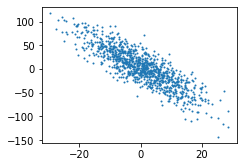

In [5]:
def set_figsize(figsize=(3.5, 2.5)):
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(x[: ,1], true_y, 1)

### 3、创建线性模型

In [6]:
class Mymodel():
    def __init__(self):
        self.w = tf.Variable([[2.3, 1.2]])
        self.b = tf.Variable([8.0])
    
    def __call__(self, x):
        self.y = tf.matmul(x , tf.transpose(self.w)) + self.b
        return self.y

### 4、数据处理及创建 batch_size 迭代器

In [7]:
def process(x, y):
    return x, y
    
db = tf.data.Dataset.from_tensor_slices((x, true_y))
db = db.shuffle(100)
db2 = db.map(process)
db_batch = db.batch(32)
# db_iter = next(iter(db_batch))
# print(db_iter[1].shape)

### 5、定义损失函数

In [8]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - tf.reshape(desired_y, predicted_y.shape)))


### 6、定义一次损失计算及梯度更新训练

In [9]:
def train(model, inputs, outputs, learning_rate):    # 传入模型，输入，输出，及学习率
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
        print('loss',current_loss)
    dW, db = t.gradient(current_loss, [model.w, model.b])   # 梯度计算
    # tf.assign_sub(ref, value, use_locking=None, name=None)，变量 ref 减去 value值，即 ref = ref - value
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)


### 7、迭代训练

In [10]:
model = Mymodel()

Ws, bs = [], []
epoches = 20

steps = int(1000/32)
for i in range(epoches):
    for d in iter(db_batch):
#         d = next(iter(db_batch))
        it = d[0]
#         print(it)
        ot = d[1]
#         print(ot)
#         current_loss = loss(model(it), ot)
#         print(current_loss)

        train(model, it, ot, learning_rate=0.001)

    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    print('w',(Ws[-1]))
    print('b',(bs[-1]))
#         print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
#               (epoch, Ws[-1], bs[-1], current_loss))

loss tf.Tensor(2445.0125, shape=(), dtype=float32)
loss tf.Tensor(986.10406, shape=(), dtype=float32)
loss tf.Tensor(770.54443, shape=(), dtype=float32)
loss tf.Tensor(632.2551, shape=(), dtype=float32)
loss tf.Tensor(357.67657, shape=(), dtype=float32)
loss tf.Tensor(428.0556, shape=(), dtype=float32)
loss tf.Tensor(95.78837, shape=(), dtype=float32)
loss tf.Tensor(117.63864, shape=(), dtype=float32)
loss tf.Tensor(97.90771, shape=(), dtype=float32)
loss tf.Tensor(54.762634, shape=(), dtype=float32)
loss tf.Tensor(41.46984, shape=(), dtype=float32)
loss tf.Tensor(32.51594, shape=(), dtype=float32)
loss tf.Tensor(22.74289, shape=(), dtype=float32)
loss tf.Tensor(25.077873, shape=(), dtype=float32)
loss tf.Tensor(26.030396, shape=(), dtype=float32)
loss tf.Tensor(11.95016, shape=(), dtype=float32)
loss tf.Tensor(18.601967, shape=(), dtype=float32)
loss tf.Tensor(17.271336, shape=(), dtype=float32)
loss tf.Tensor(15.401177, shape=(), dtype=float32)
loss tf.Tensor(17.318445, shape=(), dty

w [[ 1.9989305 -3.3975475]]
b [6.783766]
loss tf.Tensor(6.665367, shape=(), dtype=float32)
loss tf.Tensor(6.735651, shape=(), dtype=float32)
loss tf.Tensor(6.588562, shape=(), dtype=float32)
loss tf.Tensor(6.4667697, shape=(), dtype=float32)
loss tf.Tensor(6.7059317, shape=(), dtype=float32)
loss tf.Tensor(6.556155, shape=(), dtype=float32)
loss tf.Tensor(6.526796, shape=(), dtype=float32)
loss tf.Tensor(6.539233, shape=(), dtype=float32)
loss tf.Tensor(6.5232925, shape=(), dtype=float32)
loss tf.Tensor(6.4549885, shape=(), dtype=float32)
loss tf.Tensor(6.4088655, shape=(), dtype=float32)
loss tf.Tensor(6.511893, shape=(), dtype=float32)
loss tf.Tensor(6.356221, shape=(), dtype=float32)
loss tf.Tensor(6.3299365, shape=(), dtype=float32)
loss tf.Tensor(6.2447844, shape=(), dtype=float32)
loss tf.Tensor(6.341277, shape=(), dtype=float32)
loss tf.Tensor(6.433324, shape=(), dtype=float32)
loss tf.Tensor(6.3062735, shape=(), dtype=float32)
loss tf.Tensor(6.2921095, shape=(), dtype=float32)


loss tf.Tensor(2.8820198, shape=(), dtype=float32)
loss tf.Tensor(2.8904407, shape=(), dtype=float32)
loss tf.Tensor(2.7501848, shape=(), dtype=float32)
loss tf.Tensor(2.8570995, shape=(), dtype=float32)
loss tf.Tensor(2.7129393, shape=(), dtype=float32)
loss tf.Tensor(2.8991828, shape=(), dtype=float32)
loss tf.Tensor(2.8949363, shape=(), dtype=float32)
loss tf.Tensor(2.8512459, shape=(), dtype=float32)
loss tf.Tensor(2.7488852, shape=(), dtype=float32)
loss tf.Tensor(2.70021, shape=(), dtype=float32)
loss tf.Tensor(2.8221633, shape=(), dtype=float32)
loss tf.Tensor(2.7345371, shape=(), dtype=float32)
w [[ 2.0041833 -3.4136932]]
b [5.8492556]
loss tf.Tensor(2.828928, shape=(), dtype=float32)
loss tf.Tensor(2.7091272, shape=(), dtype=float32)
loss tf.Tensor(2.740276, shape=(), dtype=float32)
loss tf.Tensor(2.6509018, shape=(), dtype=float32)
loss tf.Tensor(2.6307192, shape=(), dtype=float32)
loss tf.Tensor(2.49261, shape=(), dtype=float32)
loss tf.Tensor(2.8679762, shape=(), dtype=floa

loss tf.Tensor(1.3665643, shape=(), dtype=float32)
loss tf.Tensor(1.3503842, shape=(), dtype=float32)
loss tf.Tensor(1.345479, shape=(), dtype=float32)
loss tf.Tensor(1.3342055, shape=(), dtype=float32)
loss tf.Tensor(1.4159235, shape=(), dtype=float32)
loss tf.Tensor(1.3231312, shape=(), dtype=float32)
loss tf.Tensor(1.3226478, shape=(), dtype=float32)
loss tf.Tensor(1.2718807, shape=(), dtype=float32)
loss tf.Tensor(1.2451862, shape=(), dtype=float32)
loss tf.Tensor(1.2808108, shape=(), dtype=float32)
loss tf.Tensor(1.3092132, shape=(), dtype=float32)
loss tf.Tensor(1.3471813, shape=(), dtype=float32)
loss tf.Tensor(1.2639903, shape=(), dtype=float32)
loss tf.Tensor(1.2703474, shape=(), dtype=float32)
loss tf.Tensor(1.3382993, shape=(), dtype=float32)
loss tf.Tensor(1.3171556, shape=(), dtype=float32)
loss tf.Tensor(1.2691147, shape=(), dtype=float32)
loss tf.Tensor(1.230077, shape=(), dtype=float32)
w [[ 1.9920498 -3.4136598]]
b [5.3229175]
loss tf.Tensor(1.2818394, shape=(), dtype=

In [ ]:
#     w = tf.constant([[2, -3.4]])
#     b = tf.constant([4.2])
# print(bs)
# plt.plot(epochs, Ws, 'r',
#          epochs, bs, 'b')
# plt.plot([TRUE_W] * len(epochs), 'r--',
#          [TRUE_b] * len(epochs), 'b--')
# plt.legend(['W', 'b', 'true W', 'true_b'])
# plt.show()


plt.figure(figsize=(100, 60))
plt.plot(range(epoches), [i[0] for i in Ws], 'r',
         range(epoches), [i[0] for i in bs], 'b', linewidth=2)
plt.plot([2] * epoches, 'r--',
         [4.2] * epoches, 'b--', linewidth=2)

plt.xlabel('epoches(time)')
plt.ylabel("w/b")
plt.grid(True)
plt.title("Python chart")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()